Shape of X: (150, 4)
Shape of transformed X: (150, 2)


C:\Users\sayye\AppData\Local\Temp\ipykernel_9184\848620849.py:67: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3)


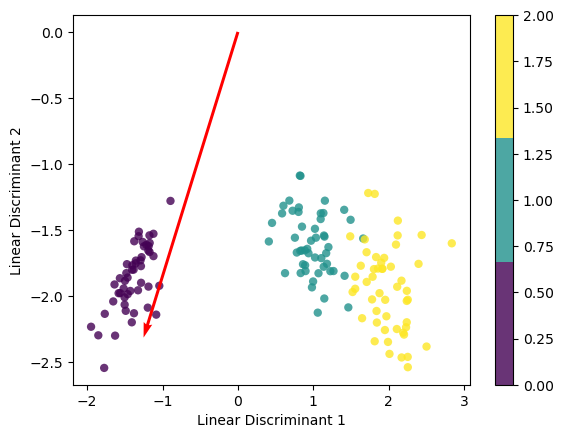

In [8]:
import numpy as np


class LDA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.linear_discriminants = None

    def fit(self, X, y):
        n_features = X.shape[1]
        class_labels = np.unique(y)

        mean_overall = np.mean(X, axis=0)
        SW = np.zeros((n_features, n_features))
        SB = np.zeros((n_features, n_features))
        for c in class_labels:
            X_c = X[y == c]
            mean_c = np.mean(X_c, axis=0)
            SW += (X_c - mean_c).T.dot((X_c - mean_c))

            n_c = X_c.shape[0]
            mean_diff = (mean_c - mean_overall).reshape(n_features, 1)
            SB += n_c * (mean_diff).dot(mean_diff.T)

        A = np.linalg.inv(SW).dot(SB)
        eigenvalues, eigenvectors = np.linalg.eig(A)
        eigenvectors = eigenvectors.T
        idxs = np.argsort(abs(eigenvalues))[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        self.linear_discriminants = eigenvectors[0 : self.n_components]

    def transform(self, X):
        return np.dot(X, self.linear_discriminants.T)


if __name__ == "__main__":
    data = datasets.load_iris()
    X, y = data.data, data.target

    lda = LDA(2)
    lda.fit(X, y)
    X_projected = lda.transform(X)

    print("Shape of X:", X.shape)
    print("Shape of transformed X:", X_projected.shape)

    x1, x2 = X_projected[:, 0], X_projected[:, 1]

    plt.scatter(
        x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3)
    )

    plt.xlabel("Linear Discriminant 1")
    plt.ylabel("Linear Discriminant 2")
    plt.colorbar()

    # Plot the eigenvector corresponding to the highest eigenvalue
    highest_eigenvector = lda.linear_discriminants[0]
    
    # Scale the eigenvector for better visibility
    scaling_factor = 6  # You can adjust this value
    scaled_eigenvector = highest_eigenvector * scaling_factor
    
    plt.quiver(0, 0, scaled_eigenvector[0], scaled_eigenvector[1], angles='xy', scale_units='xy', scale=1, color='red')

    plt.show()

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

class LDA:
    # ... (rest of the LDA class implementation)

if __name__ == "__main__":
    data = datasets.load_iris()
    X, y = data.data, data.target

    # Project the data onto the 2 primary linear discriminants
    lda = LDA(2)
    lda.fit(X, y)
    X_projected = lda.transform(X)

    print("Shape of X:", X.shape)
    print("Shape of transformed X:", X_projected.shape)

    x1, x2 = X_projected[:, 0], X_projected[:, 1]

    plt.scatter(
        x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3)
    )

    plt.xlabel("Linear Discriminant 1")
    plt.ylabel("Linear Discriminant 2")
    plt.colorbar()

    # Plot the eigenvector corresponding to the highest eigenvalue
    highest_eigenvector = lda.linear_discriminants[0]
    plt.quiver(0, 0, highest_eigenvector[0], highest_eigenvector[1], angles='xy', scale_units='xy', scale=1, color='red')

    plt.show()


IndentationError: expected an indented block after class definition on line 5 (3657430842.py, line 8)